# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

# Loading the dataset

In [2]:
df = pd.read_json('super_store_data.json')

# Exploratory Data Analysis and data Cleaning

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Payment Mode
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,Online
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,Online
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,Cards
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,Online
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,Online


In [4]:
df.shape

(5901, 20)

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Profit           0
Payment Mode     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         5901 non-null   int64  
 1   Order ID       5901 non-null   object 
 2   Order Date     5901 non-null   object 
 3   Ship Date      5901 non-null   object 
 4   Ship Mode      5901 non-null   object 
 5   Customer ID    5901 non-null   object 
 6   Customer Name  5901 non-null   object 
 7   Segment        5901 non-null   object 
 8   Country        5901 non-null   object 
 9   City           5901 non-null   object 
 10  State          5901 non-null   object 
 11  Region         5901 non-null   object 
 12  Product ID     5901 non-null   object 
 13  Category       5901 non-null   object 
 14  Sub-Category   5901 non-null   object 
 15  Product Name   5901 non-null   object 
 16  Sales          5901 non-null   float64
 17  Quantity       5901 non-null   int64  
 18  Profit  

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [8]:
df['Year'] = df['Order Date'].dt.strftime('%Y')
df['Month'] = df['Order Date'].dt.strftime('%B')

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Payment Mode', 'Year', 'Month'],
      dtype='object')

# Data Analysis and Visulizations

In [10]:
def convert_to_millions(number):
    million_number = number / 1000000
    return f"{million_number:.2f}M"

float_number = np.sum(df['Sales'])
string_millions = convert_to_millions(float_number)
ss = f"| Total Sales: {string_millions} |"
for i in range(len(ss)):
    print("-",end='')
print(f"\n{ss}")
for i in range(len(ss)):
    print("-",end='')
print()

----------------------
| Total Sales: 1.57M |
----------------------


In [11]:
def convert_to_thousands(number):
    thousand_number = number / 1000
    return f"{thousand_number:.0f}K"

float_number = np.sum(df['Profit'])
string_thousands = convert_to_thousands(float_number)
ss=f"| Total Profit: {string_thousands} |" 
for i in range(len(ss)):
    print("-",end='')
print(f"\n{ss}")
for i in range(len(ss)):
    print("-",end='')
print()

----------------------
| Total Profit: 175K |
----------------------


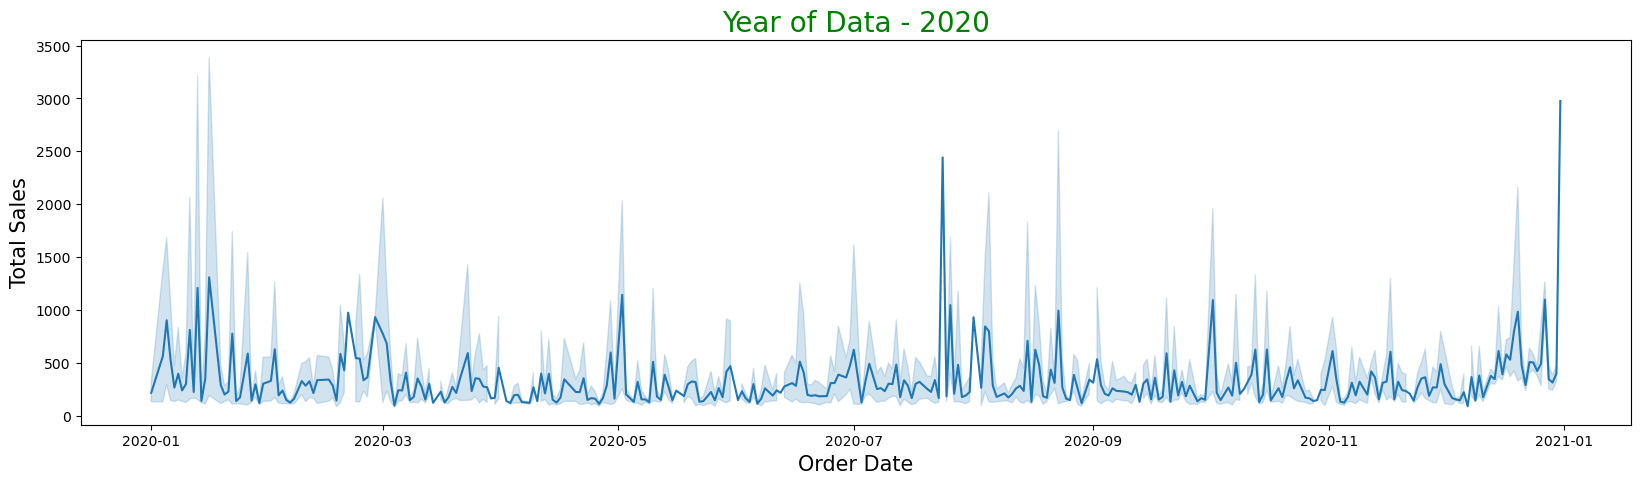

In [12]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Order Date', y='Sales', data=df[df['Year']=='2020'])
plt.title('Year of Data - 2020', fontsize=20, color='g')
plt.xlabel('Order Date', fontsize=15)
plt.ylabel('Total Sales', fontsize=15)
plt.show()

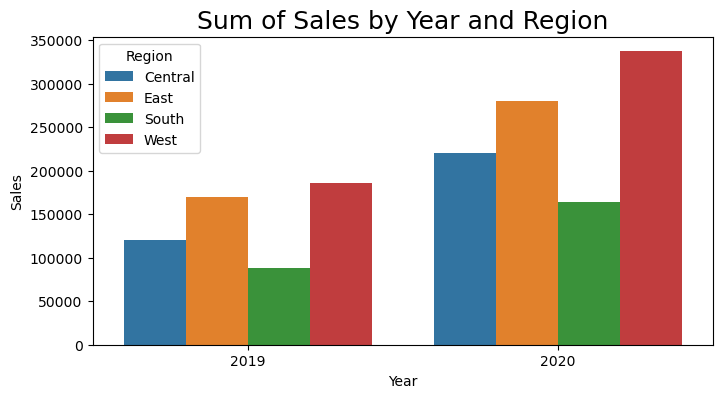

In [13]:
total_sales_month = df.groupby(['Year','Region'], as_index=False)['Sales'].sum().sort_values(by='Year', ascending=True)
plt.figure(figsize=(8,4))
sns.barplot(x='Year', y='Sales', data=total_sales_month, hue='Region')
plt.title('Sum of Sales by Year and Region', fontsize=18)
plt.show()

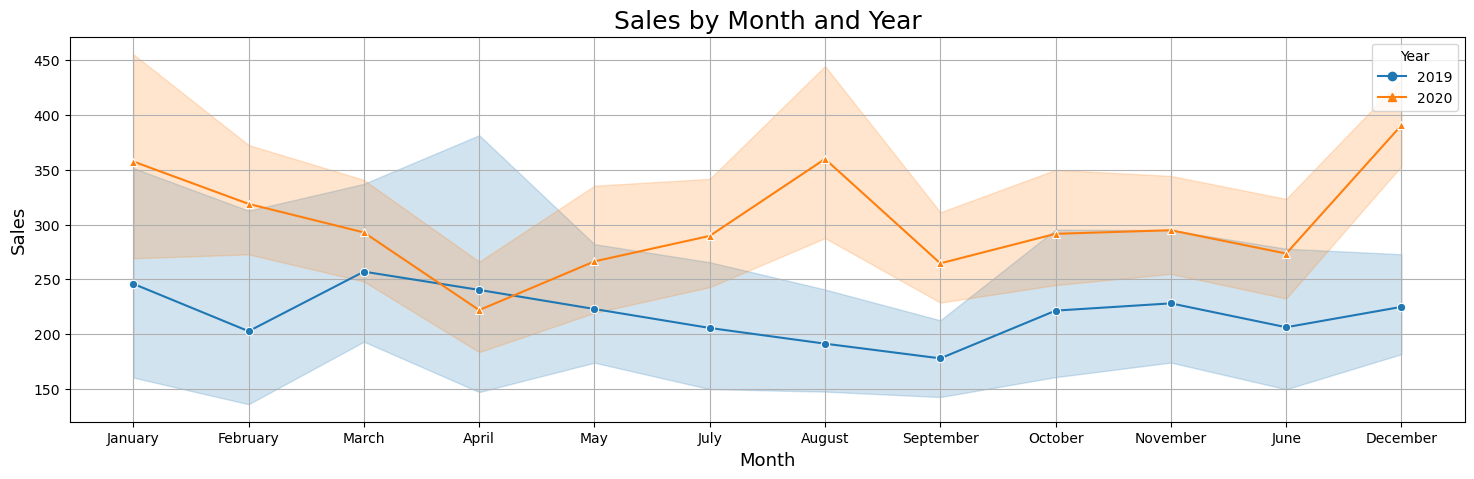

In [14]:
plt.figure(figsize=(18,5))
sns.lineplot(x='Month', y='Sales' ,data=df, hue='Year',style='Year', markers=["o","^"], dashes=False)
plt.title('Sales by Month and Year', fontsize=18)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Sales', fontsize=13)
plt.grid()
plt.show()

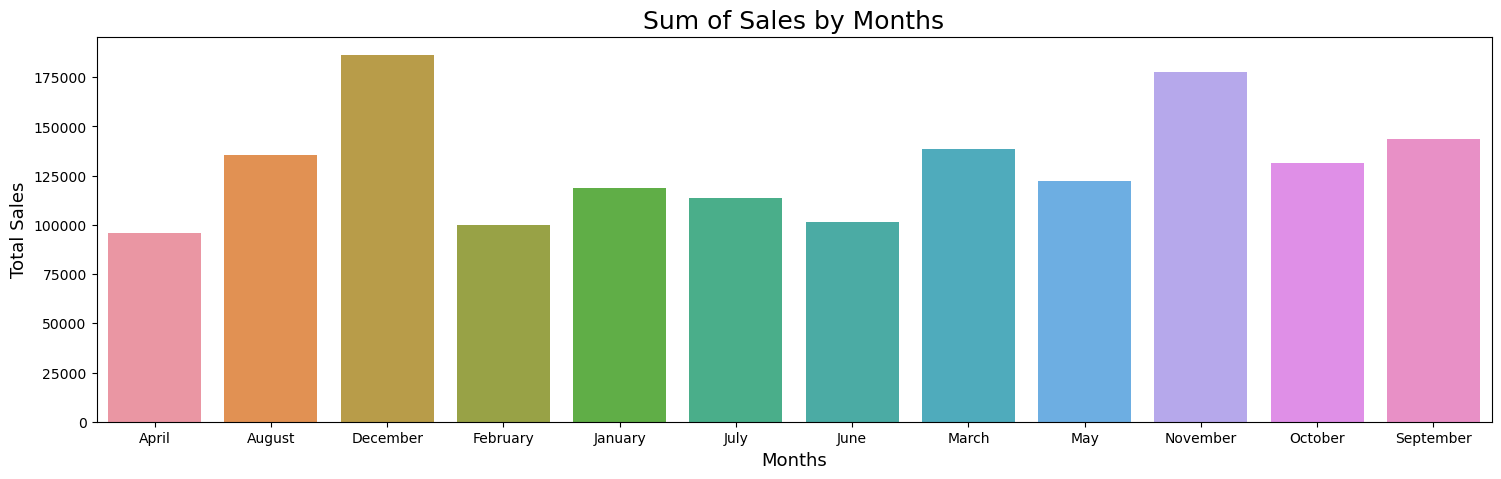

In [34]:
total_sales_month = df.groupby('Month', as_index=False)['Sales'].sum().sort_values(by='Month', ascending=True)
bns = ["January","Febuary","March","April","May","June","July","August","September","October","November","December"]
plt.figure(figsize=(18,5))
sns.barplot(x='Month', y='Sales', data=total_sales_month)
plt.title('Sum of Sales by Months', fontsize=18)
plt.xlabel('Months', fontsize=13)
plt.ylabel('Total Sales', fontsize=13)
plt.show()

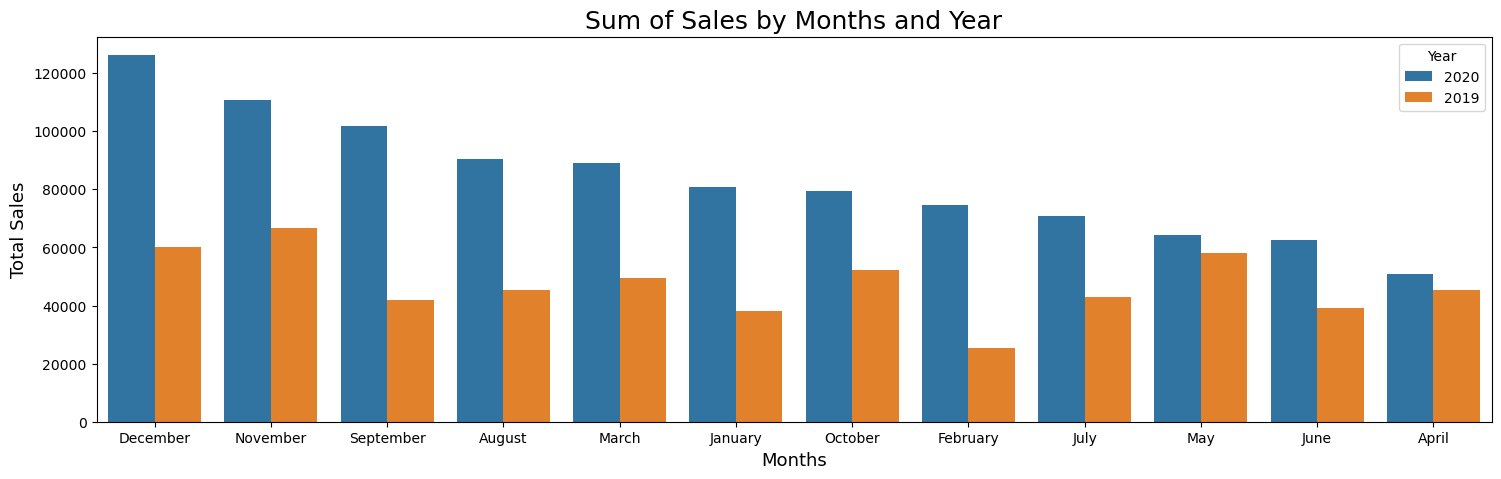

In [16]:
total_sales_month = df.groupby(['Year','Month'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
plt.figure(figsize=(18,5))
sns.barplot(x='Month', y='Sales', data=total_sales_month, hue='Year')
plt.title('Sum of Sales by Months and Year', fontsize=18)
plt.xlabel('Months', fontsize=13)
plt.ylabel('Total Sales', fontsize=13)
plt.show()

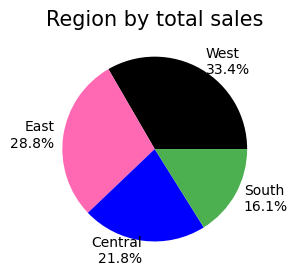

In [17]:
most_region = df.groupby('Region', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
x_sum = np.sum([i for i in most_region['Sales']])
find_per=[]
for i in range(most_region.shape[0]):
    m=most_region.iloc[i]
    a = (m['Sales']*100) / x_sum
    c = f"{m['Region']}\n{round(a, 1)}%"
    find_per.append(c)
mylabels = find_per
mycolors = ["black", "hotpink", "b", "#4CAF50"]
plt.figure(figsize = (4,3))
plt.pie(most_region['Sales'], labels=mylabels, colors=mycolors)
plt.title('Region by total sales', fontsize=15)
plt.show()

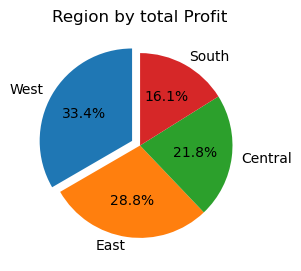

In [18]:
most_profit_region = df.groupby('Region', as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False)
mylabels = [i for i in most_profit_region['Region']]
myexplode = [0.1,0,0,0]
plt.figure(figsize=(4,3))
plt.pie(most_region['Sales'], labels=mylabels, startangle=90, explode=myexplode, autopct='%1.1f%%')
plt.title('Region by total Profit')
plt.show()

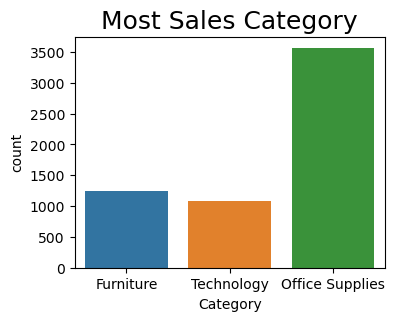

In [19]:
plt.figure(figsize=(4,3))
sns.countplot(x='Category', data=df)
plt.title('Most Sales Category',fontsize=18)
plt.show()

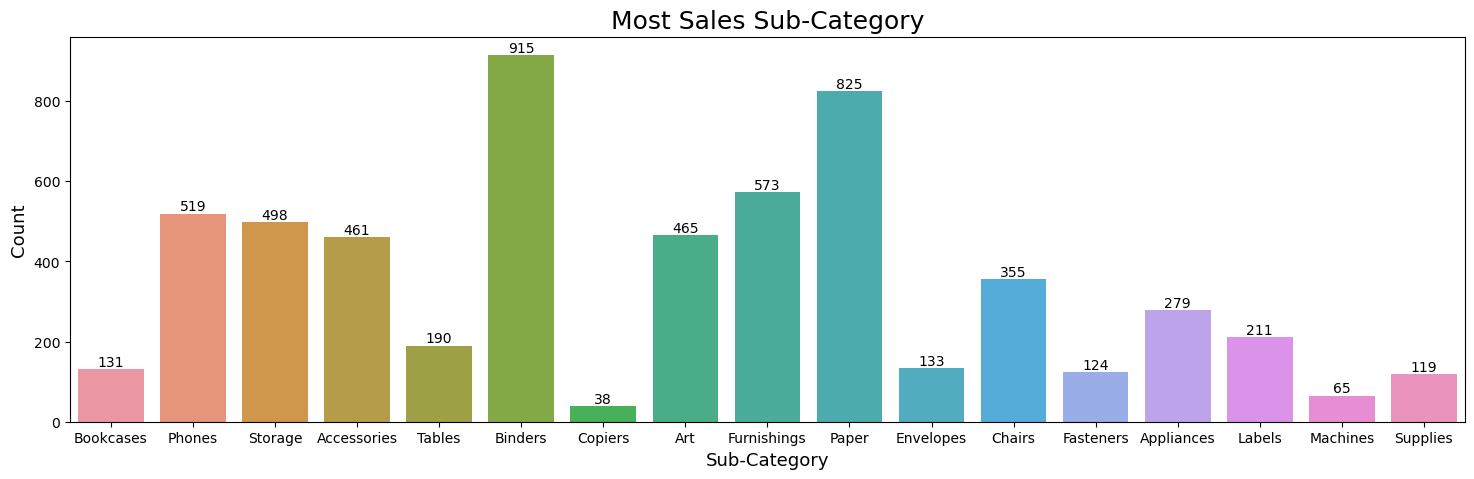

In [20]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x='Sub-Category', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Most Sales Sub-Category',fontsize=18)
plt.ylabel('Count',fontsize=13)
plt.xlabel('Sub-Category', fontsize=13)
plt.show()

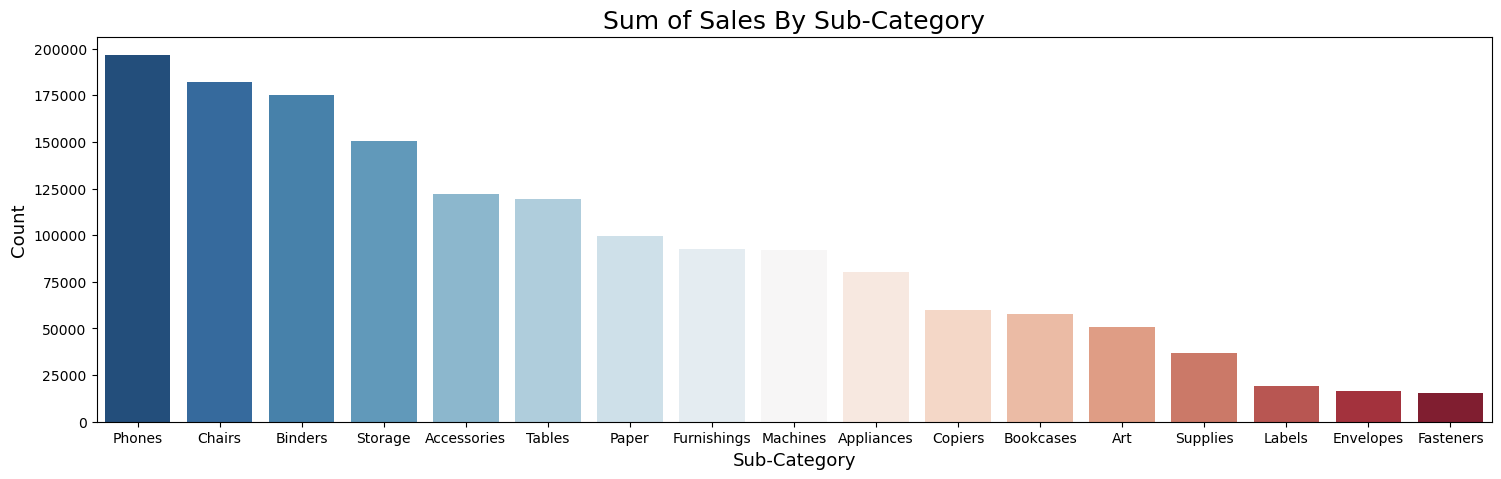

In [21]:
sum_sales = df.groupby('Sub-Category', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
plt.figure(figsize=(18,5))
sns.barplot(x='Sub-Category', y='Sales', data=sum_sales, palette='RdBu_r')
plt.title('Sum of Sales By Sub-Category', fontsize=18)
plt.ylabel('Count',fontsize=13)
plt.xlabel('Sub-Category', fontsize=13)
plt.show()

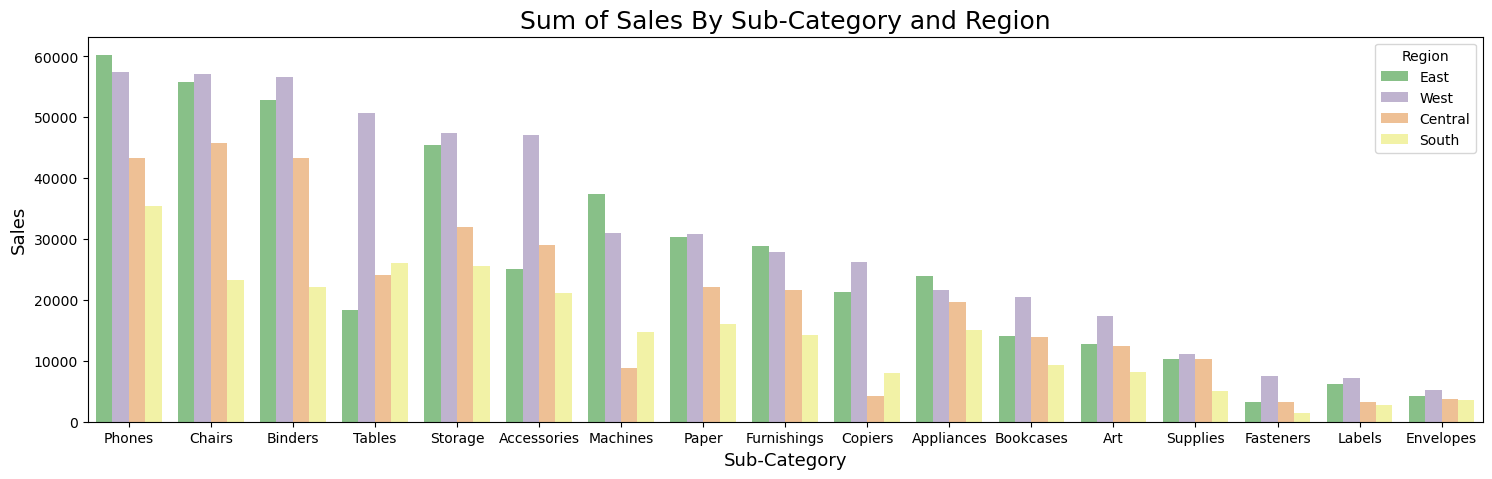

In [22]:
sum_sales = df.groupby(['Region','Sub-Category'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
plt.figure(figsize=(18,5))
sns.barplot(x='Sub-Category', y='Sales', data=sum_sales, palette='Accent', hue='Region')
plt.title('Sum of Sales By Sub-Category and Region', fontsize=18)
plt.ylabel('Sales',fontsize=13)
plt.xlabel('Sub-Category', fontsize=13)
plt.show()

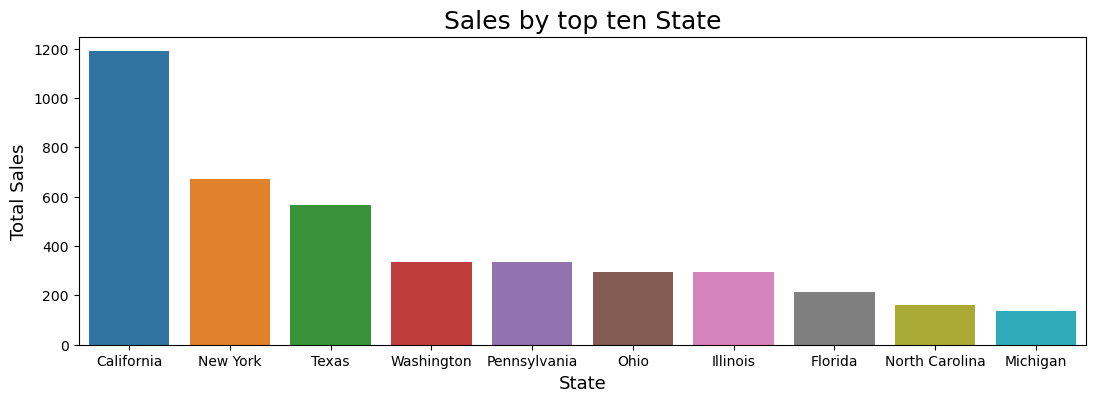

In [23]:
top_state = df.groupby('State', as_index=False)['Sales'].count().sort_values(by='Sales', ascending=False).head(10)
plt.figure(figsize = (13,4))
sns.barplot(x='State',y='Sales', data=top_state)
plt.title('Sales by top ten State', fontsize=18)
plt.ylabel('Total Sales', fontsize=13)
plt.xlabel('State', fontsize=13)
plt.show()

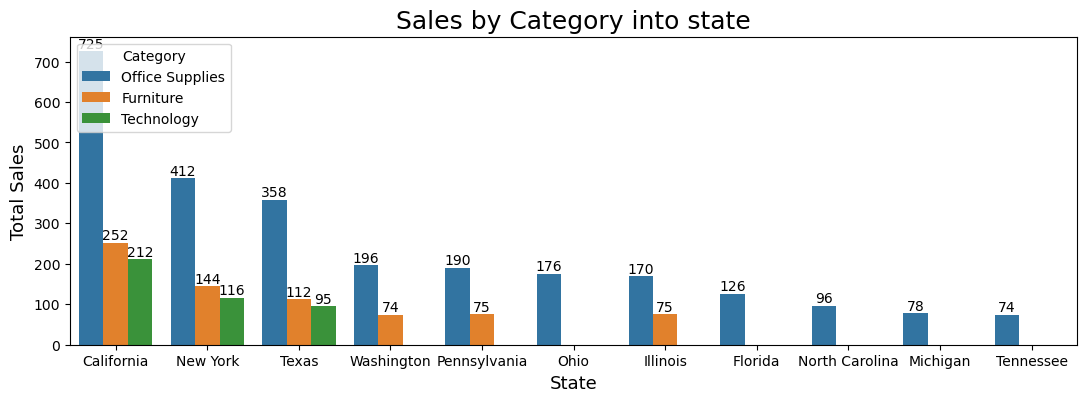

In [24]:
top_state = df.groupby(['State','Category'], as_index=False)['Sales'].count().sort_values(by='Sales', ascending=False).head(20)
plt.figure(figsize = (13,4))
ax = sns.barplot(x='State',y='Sales', data=top_state, hue='Category')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Sales by Category into state', fontsize=18)
plt.ylabel('Total Sales', fontsize=13)
plt.xlabel('State', fontsize=13)
plt.show()

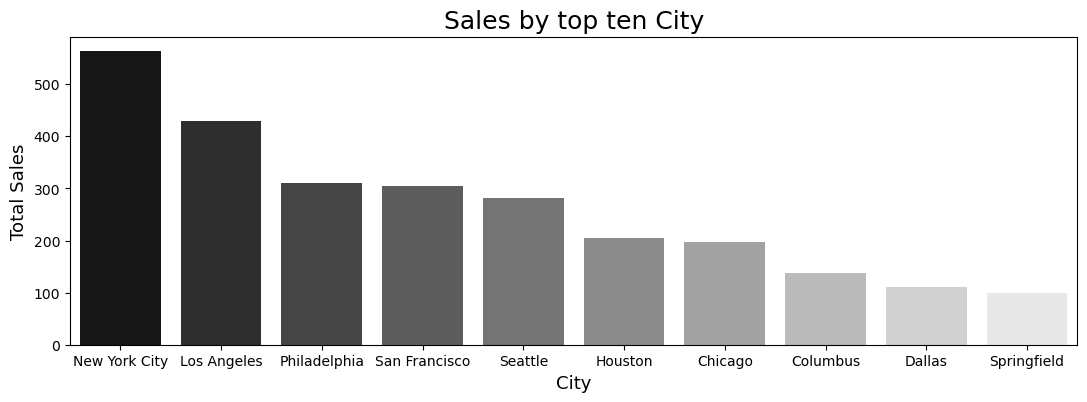

In [25]:
top_state = df.groupby('City', as_index=False)['Sales'].count().sort_values(by='Sales', ascending=False).head(10)
plt.figure(figsize = (13,4))
sns.barplot(x='City',y='Sales', data=top_state, palette='binary_r')
plt.title('Sales by top ten City', fontsize=18)
plt.ylabel('Total Sales', fontsize=13)
plt.xlabel('City', fontsize=13)
plt.show()

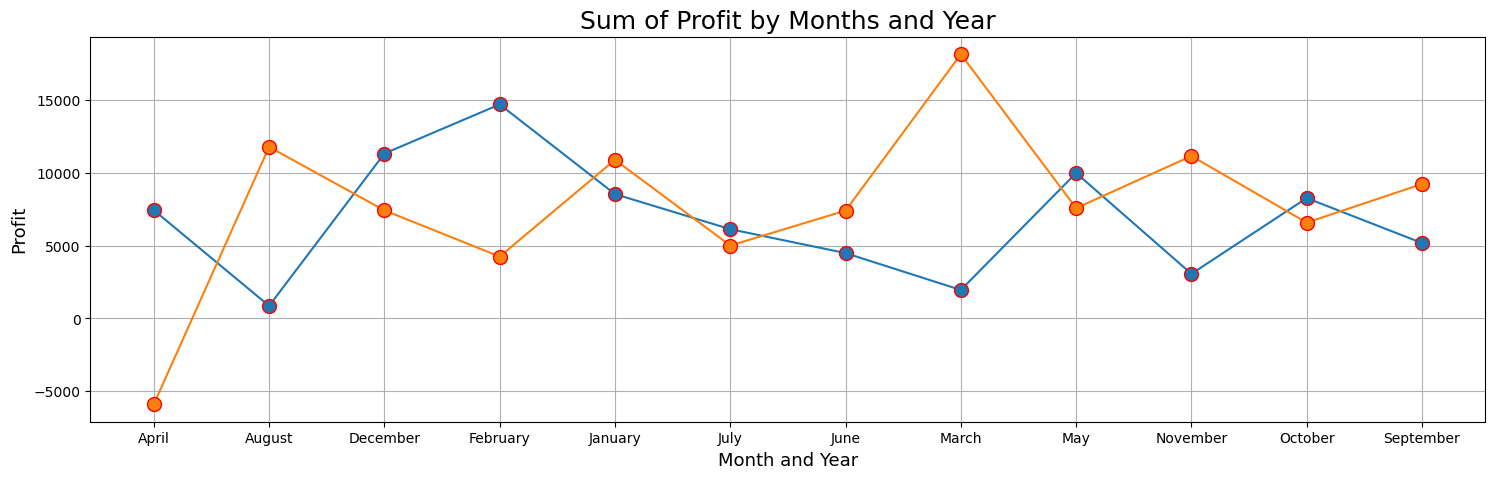

In [26]:
total_sales_month = df.groupby(['Year','Month'], as_index=False)['Profit'].sum().sort_values(by='Month', ascending=True)
year2019 = total_sales_month[total_sales_month['Year']=='2019']
year2020 = total_sales_month[total_sales_month['Year']=='2020']
plt.figure(figsize=(18,5))
plt.plot(year2019['Month'], year2019['Profit'], year2020['Month'], year2020['Profit'], mec='r', marker='o', ms=10)
plt.title('Sum of Profit by Months and Year', fontsize=18)
plt.xlabel('Month and Year', fontsize=13)
plt.ylabel('Profit', fontsize=13)
plt.grid()
plt.show()

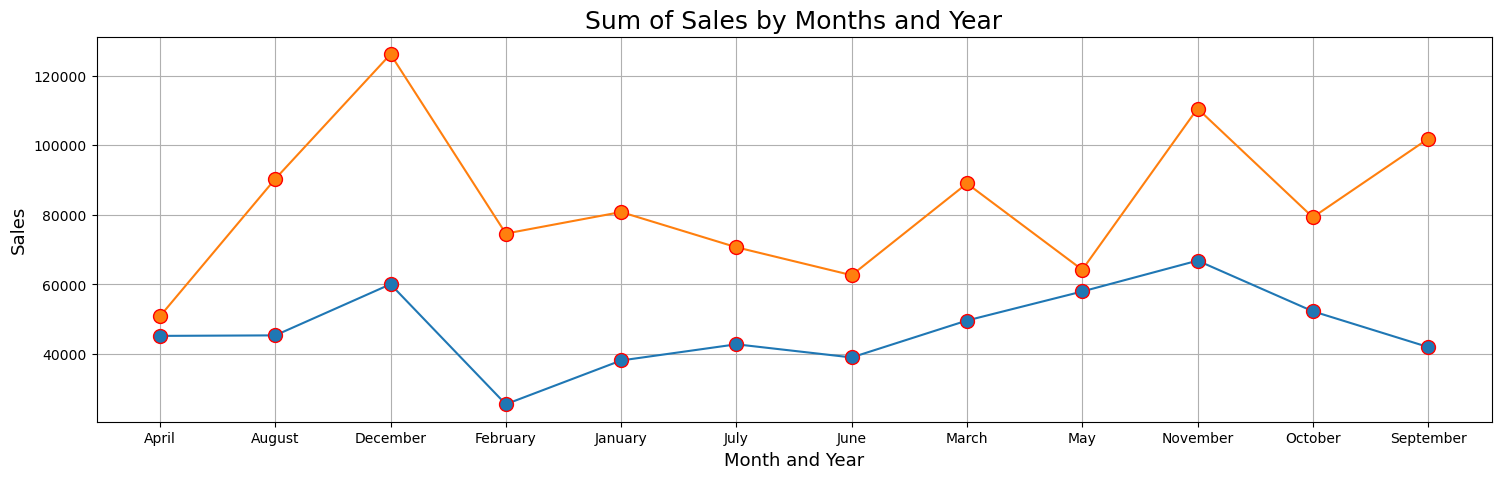

In [27]:
total_sales_month = df.groupby(['Year','Month'], as_index=False)['Sales'].sum().sort_values(by='Month', ascending=True)
year2019 = total_sales_month[total_sales_month['Year']=='2019']
year2020 = total_sales_month[total_sales_month['Year']=='2020']
plt.figure(figsize=(18,5))
plt.plot(year2019['Month'], year2019['Sales'], year2020['Month'], year2020['Sales'], mec='r', marker='o', ms=10)
plt.title('Sum of Sales by Months and Year', fontsize=18)
plt.xlabel('Month and Year', fontsize=13)
plt.ylabel('Sales', fontsize=13)
plt.grid()
plt.show()

# Most Selling Days

In [28]:
# Best selling Days
most_order_date = df.groupby('Order Date', as_index=False)['Sales'].count().sort_values(by='Sales', ascending=False).head()
most_order_date['Days'] = most_order_date['Order Date'].dt.strftime("%A")
most_order_date

,Order Date,Sales,Days
107,2019-05-09,38,Thursday
352,2020-02-09,36,Sunday
246,2019-10-11,35,Friday
355,2020-02-12,34,Wednesday
329,2020-01-12,34,Sunday


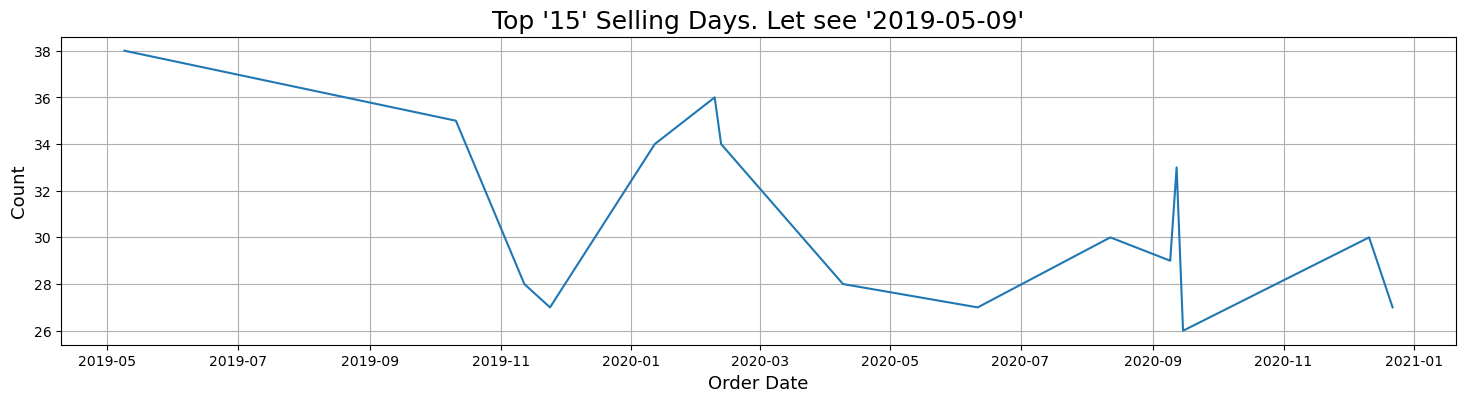

In [29]:
most_order_date = df.groupby('Order Date', as_index=False)['Sales'].count().sort_values(by='Sales', ascending=False).head(15)
most_date = most_order_date.iloc[0,0].date()
plt.figure(figsize=(18,4))
sns.lineplot(x='Order Date', y='Sales', data=most_order_date)
plt.title(f"Top '15' Selling Days. Let see '{most_date}'", fontsize=18)
plt.ylabel('Count', fontsize=13)
plt.xlabel('Order Date', fontsize=13)
plt.grid()
plt.show()

# Check Most Customer

In [30]:
check_cus = df.groupby(['Customer ID', 'Customer Name'], as_index=False)['Sales'].sum().sort_values(by=['Sales'], ascending=False).head(10)
check_cus

,Customer ID,Customer Name,Sales
144,CJ-12010,Caroline Jumper,11596.974
416,KF-16285,Karen Ferguson,10941.274
701,SV-20365,Seth Vernon,10751.148
325,HW-14935,Helen Wasserman,10074.934
252,EH-13765,Edward Hooks,9542.988
103,BS-11365,Bill Shonely,9199.780
581,PK-19075,Pete Kriz,8812.054
376,JL-15835,John Lee,8765.332
5,AB-10060,Adam Bellavance,8167.080
399,JW-15220,Jane Waco,7933.554


# Most selling Product Name

In [31]:
product_name = df.groupby('Product Name', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(10)
product_name

,Product Name,Sales
18,"3D Systems Cube Printer, 2nd Generation, Magenta",14334.890
388,Canon imageCLASS 2200 Advanced Copier,14076.824
766,Hewlett Packard LaserJet 3310 Copier,13837.732
650,GBC DocuBind TL300 Electric Binding System,12890.258
647,GBC DocuBind P400 Electric Binding System,12577.108
1311,Samsung Galaxy Mega 6.3,12370.708
988,Martin Yale Chadless Opener Electric Letter Op...,12268.902
747,HON 5400 Series Task Chairs for Big and Tall,11887.562
730,Global Troy Executive Leather Low-Back Tilter,10217.894
616,Fellowes PB500 Electric Punch Plastic Comb Bin...,9756.524


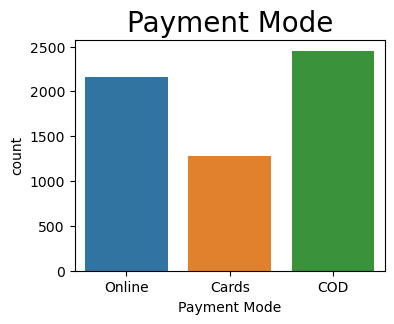

In [32]:
plt.figure(figsize=(4,3))
sns.countplot(x='Payment Mode', data=df)
plt.title('Payment Mode', fontsize=20)
plt.show()